In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import datetime,time

from sklearn import preprocessing  
start = time.time()

In [2]:
#数据集形成
c1 = [[ 1.58, 2.32, -5.8], [ 0.67, 1.58, -4.78], [ 1.04, 1.01, -3.63],
[-1.49, 2.18, -3.39], [-0.41, 1.21, -4.73], [1.39, 3.16, 2.87],
[ 1.20, 1.40, -1.89], [-0.92, 1.44, -3.22], [ 0.45, 1.33, -4.38],
[-0.76, 0.84, -1.96]]

c2 = [[ 0.21, 0.03, -2.21], [ 0.37, 0.28, -1.8], [ 0.18, 1.22, 0.16],
[-0.24, 0.93, -1.01], [-1.18, 0.39, -0.39], [0.74, 0.96, -1.16],
[-0.38, 1.94, -0.48], [0.02, 0.72, -0.17], [ 0.44, 1.31, -0.14],
[ 0.46, 1.49, 0.68]]

c3 = [[-1.54, 1.17, 0.64], [5.41, 3.45, -1.33], [ 1.55, 0.99, 2.69],
[1.86, 3.19, 1.51], [1.68, 1.79, -0.87], [3.51, -0.22, -1.39],
[1.40, -0.44, -0.92], [0.44, 0.83, 1.97], [ 0.25, 0.68, -0.99],
[ 0.66, -0.45, 0.08]]

hat_one  = np.ones(10).reshape(-1,1)
hat_zero = np.zeros(10).reshape(-1,1)

#Y=WX把偏差放进W里面,C的五-七列用one-hat表示标签
c1_h = np.array(np.concatenate([c1,hat_one,hat_one,hat_zero,hat_zero],axis=1))
c2_h = np.array(np.concatenate([c2,hat_one,hat_zero,hat_one,hat_zero],axis=1))
c3_h = np.array(np.concatenate([c3,hat_one,hat_zero,hat_zero,hat_one],axis=1))

min_max_scaler = preprocessing.MinMaxScaler() 
C = min_max_scaler.fit_transform(np.concatenate([c1_h,c2_h,c3_h],axis=0))
np.random.shuffle(C)

#min_max_scaler = preprocessing.MinMaxScaler() 
#X_minMax = min_max_scaler.fit_transform(np.concatenate([c1,c2,c3],axis=0))

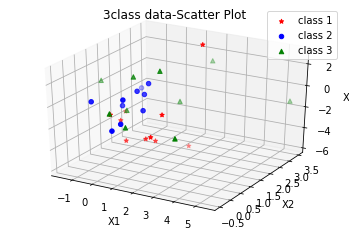

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_title('3class data-Scatter Plot')

ax.scatter(c1_h[:,0], c1_h[:,1], c1_h[:,2], c='r', marker='*',label='class 1')
ax.scatter(c2_h[:,0], c2_h[:,1], c2_h[:,2], c='b', marker='o',label='class 2')
ax.scatter(c3_h[:,0], c3_h[:,1], c3_h[:,2], c='g', marker='^',label='class 3')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.legend()
plt.savefig("data_scatter",dpi=600)
plt.show()

In [4]:
#定义运行过程中的必要函数
def sig(x): #h to out
    return 1/(1 + np.exp(-x))
def sig_v(x):
    return np.exp(-x)/(1+np.exp(-x))**2
def tanx(x):#input to h
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
def tanx_v(x):
    return 4/(np.exp(x)+np.exp(-x))**2

误差反向

隐含层到输入层
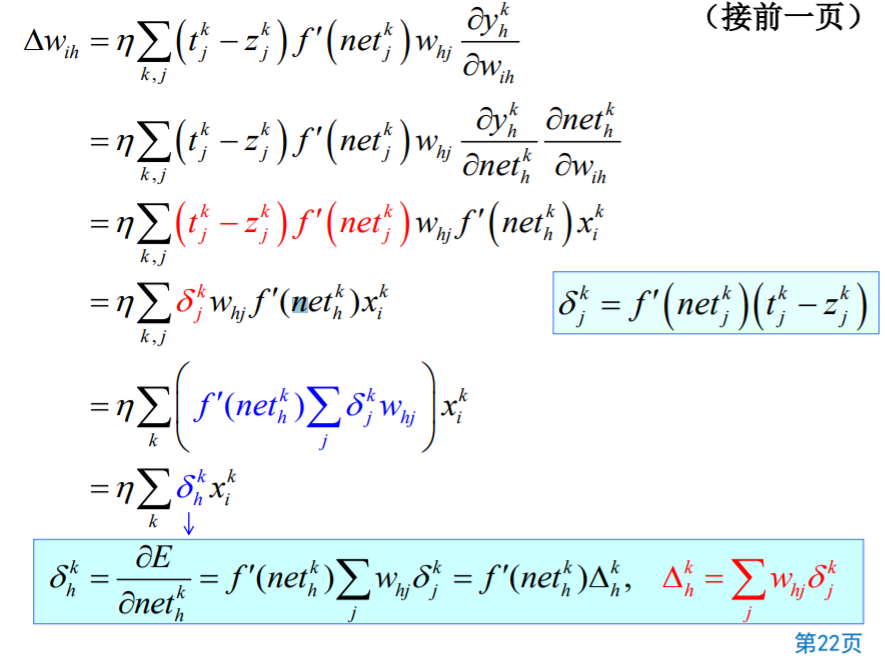

输出到隐含层
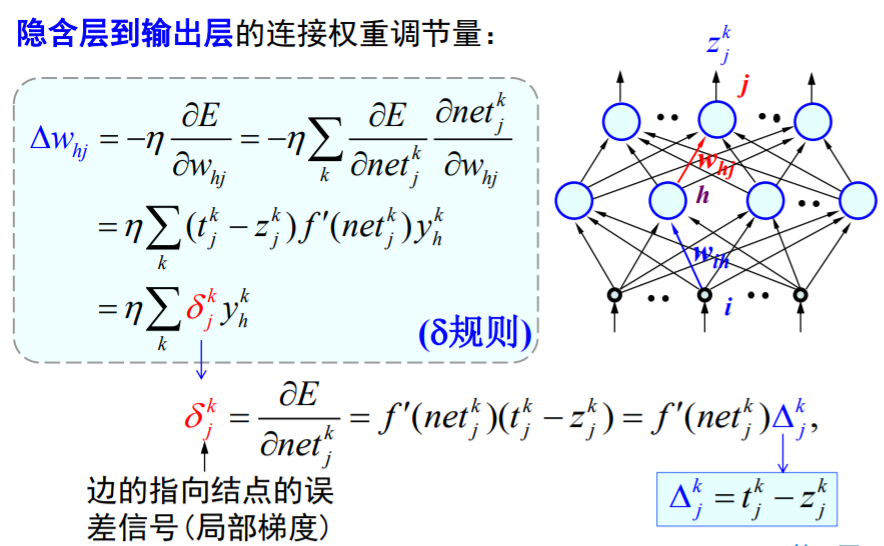

In [5]:
#隐含层节点数
in_node  = 3 + 1 #考虑偏差
hid_node = 6 + 1 #考虑偏差
out_node = 3
lr = 6e-4#学习率
k  = 2.5

w_ho = np.random.rand(hid_node,out_node)
w_ih = np.random.rand(in_node,hid_node)

#w_ho = np.ones((hid_node,out_node))/k
#w_ih = np.ones((in_node,hid_node))/k

In [6]:
##主函数
loss = 0
num = 0
loss_list_1 = []
n = []

while True:
    num = num +1
    ##数据前向传播
    y = np.dot(C[:,0:4],w_ih)## n*hid
    H = tanx(y)#激活函数1     ## n*hid
    z = np.dot(H,w_ho)
    O = sig(z)#激活函数2      ## n*out
    loss = np.sum((O-C[:,4:7].reshape(-1,3))**2)/C.shape[0] #错误率
    loss_list_1.append(loss)
    n.append(num)
    
    ##误差向后传播
    #o to h
    d_o   = np.sum((O - C[:,4:7].reshape(-1,3)),axis=0)*sig_v(z)#dT = -(label-out)*g' ##
    dwoh  = np.dot(H.T,d_o)/C.shape[0]#dT*h
    ## h to i
    d_h   = np.dot(d_o,w_ho.T)*tanx_v(y)
    dwih  = np.dot(C[:,0:4].T,d_h)/C.shape[0]
    
    #梯度下降
    w_ho = w_ho - lr*dwoh
    w_ih = w_ih - lr*dwih
    if num > 6000 or loss<0.02:
        print(loss)
        break#计算终止条件
num

0.6948352210507737


6001

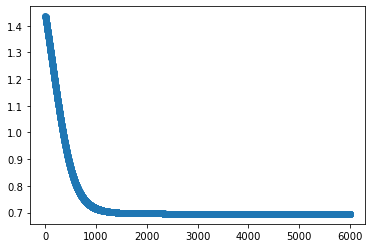

In [7]:
plt.scatter(n,loss_list_1)
plt.savefig("result",dpi=600)

In [8]:
#正确率
end = time.time()
print('隐含层节点个数为%d,初始权重都取%3.3f,计算步骤为%d时,执行时间为%3.3f(s)'%(hid_node-1,1/k,num-1,end-start))
print('正确率:',sum((O.argmax(axis=1) - C[:,4:7].reshape(-1,3).argmax(axis=1)==0))/C.shape[0])

隐含层节点个数为6,初始权重都取0.400,计算步骤为6000时,执行时间为2.191(s)
正确率: 0.2


In [9]:
#正确率
end = time.time()
print('隐含层节点个数为%d,随机初始化权重矩阵,计算步骤为%d时,执行时间为%3.3f(s)'%(hid_node-1,num-1,end-start))
print('正确率:',sum((O.argmax(axis=1) - C[:,4:7].reshape(-1,3).argmax(axis=1)==0))/C.shape[0])

隐含层节点个数为6,随机初始化权重矩阵,计算步骤为6000时,执行时间为2.206(s)
正确率: 0.2
